In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
def read_data(state):
    df = pd.read_csv('../Datasets/states/'+state+ '.csv')
    df_agg = df.groupby(['Date', 'District']).agg({'Avg_rainfall': 'sum'}).reset_index()
    pivot_df = df_agg.pivot(index='Date', columns = 'District', values='Avg_rainfall')
    pivot_df.reset_index(inplace=True)
    pivot_df.columns.name = None
    pivot_df.set_index('Date', inplace=True)
    pivot_df.reset_index(drop=True, inplace=True)
    pivot_df = pivot_df.fillna(0)
    return pivot_df

read_data('Kerala')

,Alappuzha,Ernakulam,Idukki,Kannur,Kasaragod,Kollam,Kottayam,Kozhikode,Malappuram,Palakkad,Pathanamthitta,Thiruvananthapuram,Thrissur,Wayanad
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5384,19.524494,12.488492,4.036703,0.286438,0.224850,3.605694,9.735314,3.428867,3.866969,1.575293,4.621298,7.197531,3.105006,1.949968
5385,0.000000,0.000000,0.186061,0.129540,0.155185,0.000000,0.000988,0.503364,1.186710,1.460248,0.028657,0.001010,0.008085,0.045235
5386,0.591759,0.035022,1.359973,0.000000,0.000000,0.141217,0.364947,0.000029,0.003800,0.001555,1.891524,1.061198,0.000004,0.000204
5387,0.000000,0.000000,0.037369,0.001149,0.000010,0.333830,0.000186,0.355152,1.027577,0.710523,0.056487,0.702297,0.000256,0.197057


In [3]:
df = read_data('Kerala')

In [4]:
X = df.iloc[:, :].values
y = df.iloc[:,].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [5]:
pca.explained_variance_ratio_

array([0.70458842, 0.13289924])

In [6]:
print(abs(pca.components_))
comp = abs(pca.components_)

[[0.25330122 0.30714769 0.20107432 0.33505276 0.39078228 0.17318169
  0.31475869 0.33177924 0.27212972 0.21631852 0.17914279 0.12482795
  0.29383374 0.20516739]
 [0.35264574 0.1392027  0.14322652 0.32625354 0.49862527 0.35175504
  0.30038737 0.19480982 0.06780975 0.02034991 0.30244846 0.32977613
  0.03592112 0.14911808]]


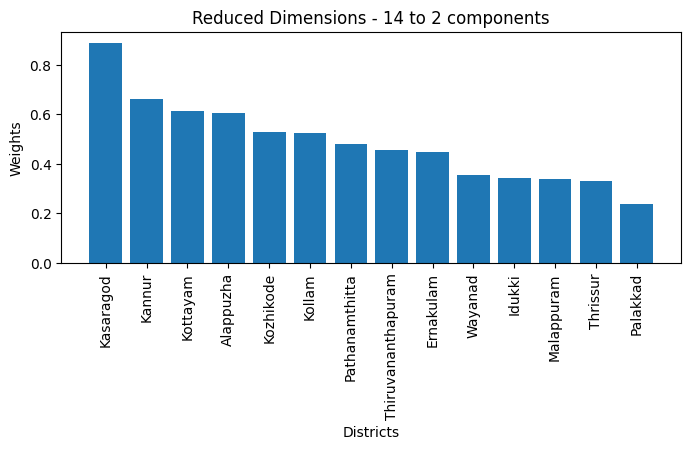

In [7]:
from collections import OrderedDict


sums = np.sum(comp, axis=0)
map1 = {}
for i in range(len(sums)):
    map1[sums[i]] = df.columns[i]

dict1 = OrderedDict(sorted(map1.items(), reverse=True))

def plot_graph(dict1):
    plt.figure(figsize=(8,3))
    plt.bar(dict1.values(), dict1.keys())
    plt.xticks(rotation=90)
    plt.xlabel('Districts')
    plt.ylabel('Weights')
    plt.title(f'Reduced Dimensions - {len(dict1)} to {len(pca.components_)} components')
    plt.show()

plot_graph(dict1)

In [8]:
map1 = {}
for i in range(len(comp[1])):   
    map1[comp[0][i]] = df.columns[i]


map2 = {}
for i in range(len(comp[1])):   
    map2[comp[1][i]] = df.columns[i]

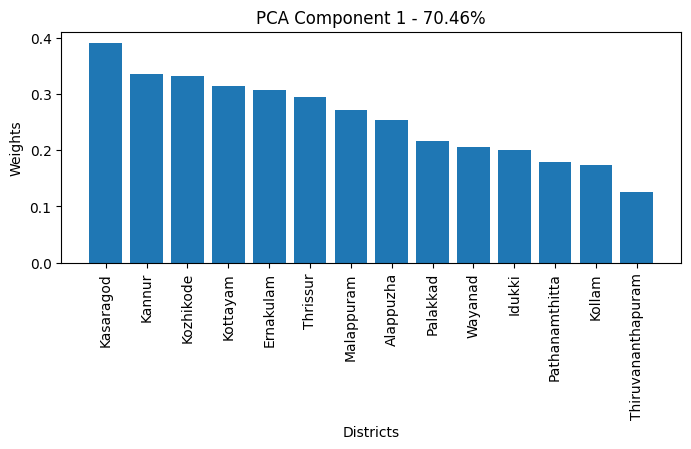

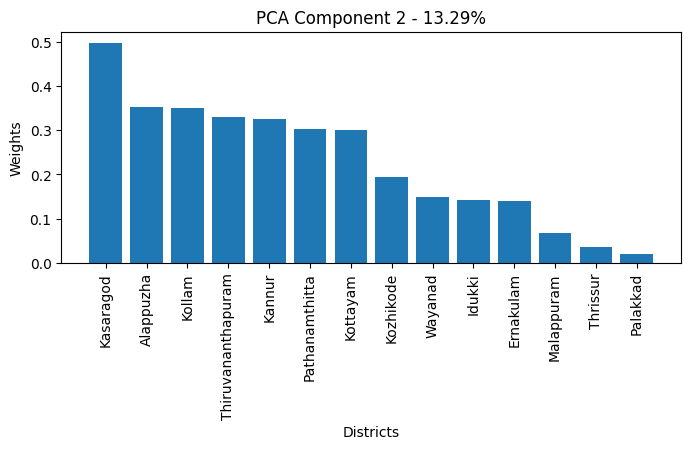

In [9]:
from collections import OrderedDict
dict1 = OrderedDict(sorted(map1.items(), reverse=True))
dict2 = OrderedDict(sorted(map2.items(), reverse=True))

def plot_graph(dict1, n):
    plt.figure(figsize=(8,3))
    plt.bar(dict1.values(), dict1.keys())
    plt.xticks(rotation=90)
    plt.xlabel('Districts')
    plt.ylabel('Weights')
    plt.title(f'PCA Component {n} - {(pca.explained_variance_ratio_[n-1]*100).round(2)}%')
    plt.show()

plot_graph(dict1, 1)
plot_graph(dict2, 2)